# Project 1: Sentiment Analysis on Movie Reviews
In this project, you are expected to solve the classification problem on movie reviews. Movie reviews have two different sentiments (positive or negative), please train machine learning or deep learning models to classify movie reviews into correct categories (1 for positive 1 and 0 for negative).



**HINT:**
* Here are some related tutorials that would be helpful:
    * https://www.kaggle.com/competitions/sentiment-analysis-on-movie-reviews/code
    * https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html 



# Data Exploration: Exploring the Dataset



First few rows of the dataframe:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
positive    25000
negative    25000
Name: sentiment, dtype: int64


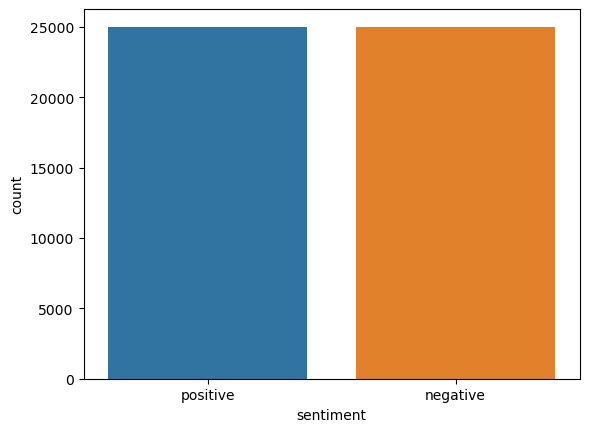

In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sea

# putting the data in dataframe 
data_frame = pd.read_csv('IMDB Dataset.csv')

# printing the first few rows of the data frame 
print("First few rows of the dataframe:")
print(data_frame.head())

# Display information about the dataframe
data_frame.info()


print(data_frame['sentiment'].value_counts())

#Visulization through sea born
sea.countplot(x='sentiment', data=data_frame)

plt.show()


# Data Preproccessing

Here are some common preproccessing steps, feel free to add more preproccessing steps if needed: 
1. check missing values. 
2. remove noise and special characters, such as "\[[^]]*\]", etc.
3. transform all words to lower case, 
4. word tokenization  
5. stop words removing and stemming,
6. divide the dataset into train set (75%) and test set (25%) with random sampling

 ......

**Hint:**
* You may need TfidVectorizer class to convert a collection of raw documents to a matrix of TF-IDF features: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html, 
* You are also welcome to use the Python Natural Language Processing Toolkit (www.nltk.org).
 


In [10]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


data_frame['review'] = data_frame['review'].str.replace(r"\[[^]]*\]", "")

data_frame['review'] = data_frame['review'].str.lower()

data_frame['review'] = data_frame['review'].apply(word_tokenize)

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
data_frame['review'] =data_frame['review'].apply(lambda x: [stemmer.stem(word) for word in x if word not in stop_words])

data_frame['review'] = data_frame['review'].apply(lambda x: ' '.join(x))

label_encoder = LabelEncoder()
data_frame['sentiment'] = label_encoder.fit_transform(data_frame['sentiment'])

X = data_frame['review']
y = data_frame['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14496\854006246.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  data_frame['review'] = data_frame['review'].str.replace(r"\[[^]]*\]", "")


# Data Modelling

* Please use the following models to classify the data:
    * Logistic Regression
    * LinearSVC
    * KNeighborsClassifier
    * Fully-connected layers, please try different number of hidden layers, different values of "hidden_layer_sizes" and "activation".
    * CNN (please use different number of convolutional layers combined with different number of fully-connected layers, and compare the results).


In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Initialize TfidfVectorizer with a maximum of 5000 features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Transform the training and testing data into TF-IDF features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Logistic Regression Classifier
lr_classifier = LogisticRegression(n_jobs=-1)
lr_classifier.fit(X_train_tfidf, y_train)
lr_preds = lr_classifier.predict(X_test_tfidf)
lr_accuracy = accuracy_score(y_test, lr_preds)
print("Logistic Regression Accuracy:", lr_accuracy)

# Linear Support Vector Classification (Linear SVC)
svc_classifier = LinearSVC(dual=True)
svc_classifier.fit(X_train_tfidf, y_train)
svc_preds = svc_classifier.predict(X_test_tfidf)
svc_accuracy = accuracy_score(y_test, svc_preds)
print("Linear SVC Accuracy:", svc_accuracy)

# K Neighbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn_classifier.fit(X_train_tfidf, y_train)
knn_preds = knn_classifier.predict(X_test_tfidf)
knn_accuracy = accuracy_score(y_test, knn_preds)
print("K Neighbors Classifier Accuracy:", knn_accuracy)

# Multi-layer Perceptron Classifier (Fully-connected Neural Network)
mlp_classifier = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=500)
mlp_classifier.fit(X_train_tfidf, y_train)
mlp_preds = mlp_classifier.predict(X_test_tfidf)
mlp_accuracy = accuracy_score(y_test, mlp_preds)
print("Fully-connected Neural Network Accuracy:", mlp_accuracy)

# Convert TF-IDF matrices into 3D arrays for Convolutional Neural Network (CNN) input
X_train_cnn = X_train_tfidf.toarray().reshape(X_train_tfidf.shape[0], X_train_tfidf.shape[1], 1)
X_test_cnn = X_test_tfidf.toarray().reshape(X_test_tfidf.shape[0], X_test_tfidf.shape[1], 1)

# Define a Sequential model for CNN
cnn_model = Sequential([
    Conv1D(128, 5, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the CNN model
optimizer = Adam(learning_rate=1e-3)
cnn_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(X_train_cnn, y_train, epochs=5, batch_size=32, verbose=1)

# Make predictions with the trained CNN model
y_pred_probs = cnn_model.predict(X_test_cnn)
y_pred_cnn = [1 if prob > 0.5 else 0 for prob in y_pred_probs]
cnn_accuracy = accuracy_score(y_test, y_pred_cnn)
print("CNN Accuracy:", cnn_accuracy)



Logistic Regression Accuracy: 0.88232
Linear SVC Accuracy: 0.88232
K Neighbors Classifier Accuracy: 0.7392
Fully-connected Neural Network Accuracy: 0.8624

Epoch 1/5


1172/1172 [==============================] - 146s 121ms/step - loss: 0.6930 - accuracy: 0.5117
Epoch 2/5
1172/1172 [==============================] - 167s 143ms/step - loss: 0.6922 - accuracy: 0.5208
Epoch 3/5
1172/1172 [==============================] - 195s 166ms/step - loss: 0.6922 - accuracy: 0.5197
Epoch 4/5
1172/1172 [==============================] - 192s 164ms/step - loss: 0.6920 - accuracy: 0.5185
Epoch 5/5
391/391 [==============================] - 13s 29ms/step
CNN Accuracy: 0.53352


# Results: summarize and visualize the results discovered from the analysis

Please use figures or tables to present the results.


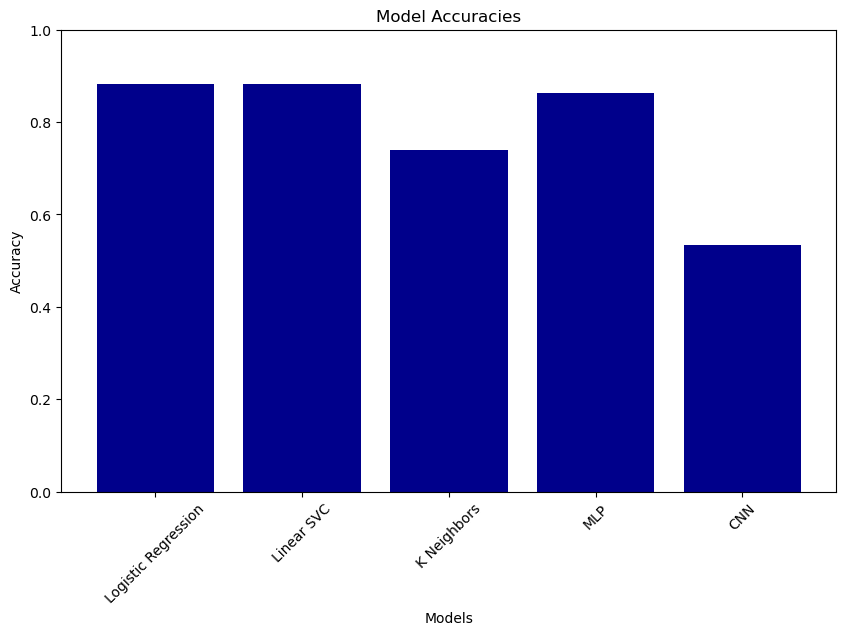

In [11]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Linear SVC', 'K Neighbors', 'MLP', 'CNN']
accuracies = [lr_accuracy, svc_accuracy, knn_accuracy, mlp_accuracy, cnn_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='darkblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()


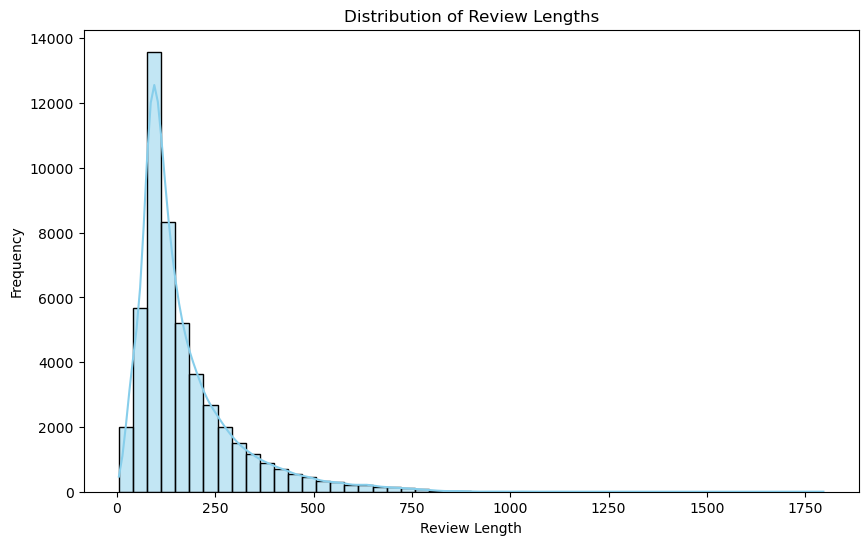

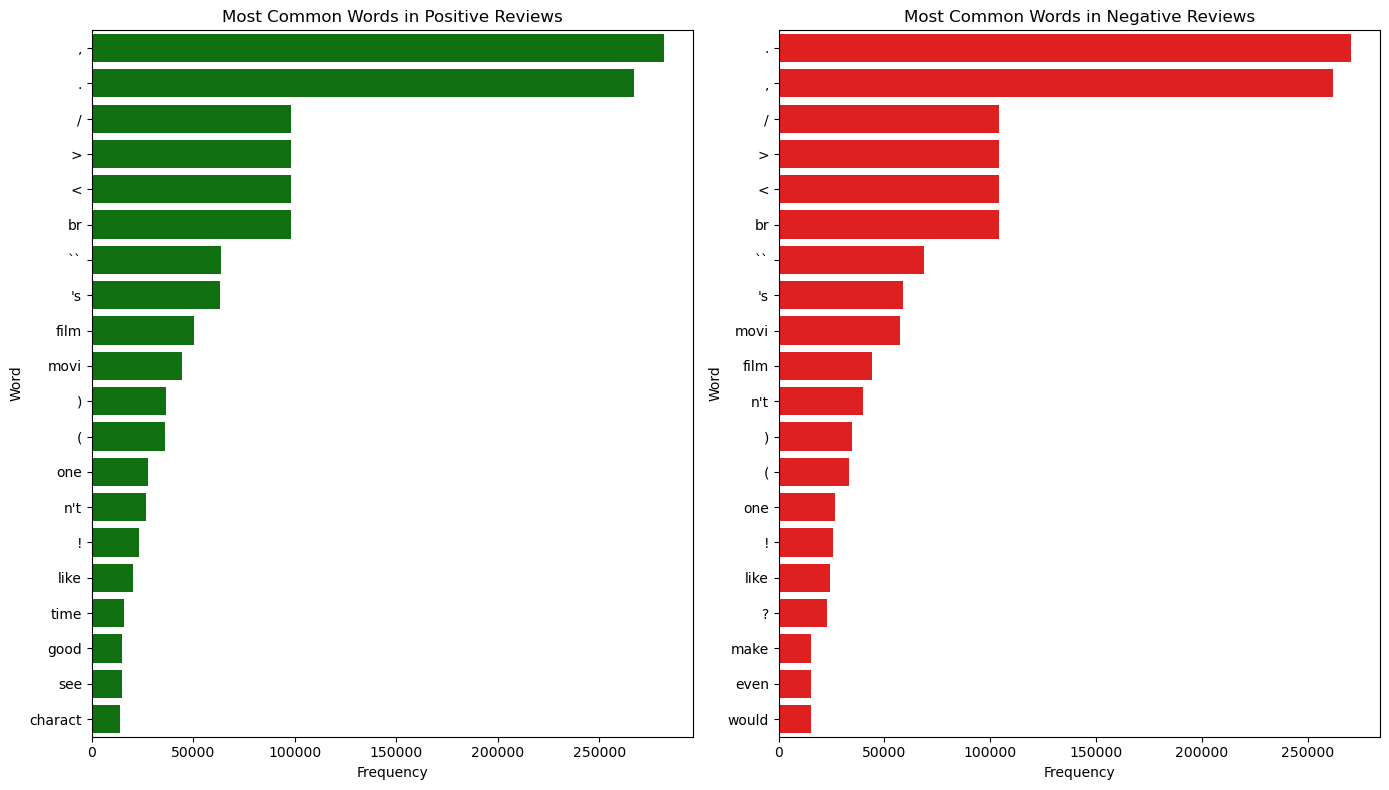

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of review lengths
df['review_length'] = df['review'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

# Visualize the most common words in positive and negative reviews
from collections import Counter

positive_reviews = df[df['sentiment'] == 1]['review']
negative_reviews = df[df['sentiment'] == 0]['review']

positive_word_freq = Counter(" ".join(positive_reviews).split()).most_common(20)
negative_word_freq = Counter(" ".join(negative_reviews).split()).most_common(20)

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
sns.barplot(x=[word[1] for word in positive_word_freq], y=[word[0] for word in positive_word_freq], color='green')
plt.title('Most Common Words in Positive Reviews')
plt.xlabel('Frequency')
plt.ylabel('Word')

plt.subplot(1, 2, 2)
sns.barplot(x=[word[1] for word in negative_word_freq], y=[word[0] for word in negative_word_freq], color='red')
plt.title('Most Common Words in Negative Reviews')
plt.xlabel('Frequency')
plt.ylabel('Word')

plt.tight_layout()
plt.show()
